# Linear Regression
## Question 1
Make a class called LinearRegression which provides two functions : fit and predict. Try to implement it from scratch. If stuck, refer to the examples folder.

In [1]:
import numpy as np

class LinearRegression:
    def __init__(self):
        self.w=None   
        self.b=None  

    def fit(self,X,y,lr=0.01,epochs=1000):
        X=np.array(X)
        y=np.array(y)

        n_samples,n_features=X.shape

        self.w=np.zeros(n_features)
        self.b=0.0

        for _ in range(epochs):
            y_pred=X.dot(self.w)+self.b

            dw=(1/n_samples)*X.T.dot(y_pred - y)
            db=(1/n_samples)*np.sum(y_pred - y)

            self.w -= lr * dw
            self.b -= lr * db

    def predict(self,X):
        X=np.array(X)
        return X.dot(self.w) + self.b


## Question 2

Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the model created in question 1 and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs) to achieve losses close to that of the sklearn models.

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

Null values:
 No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


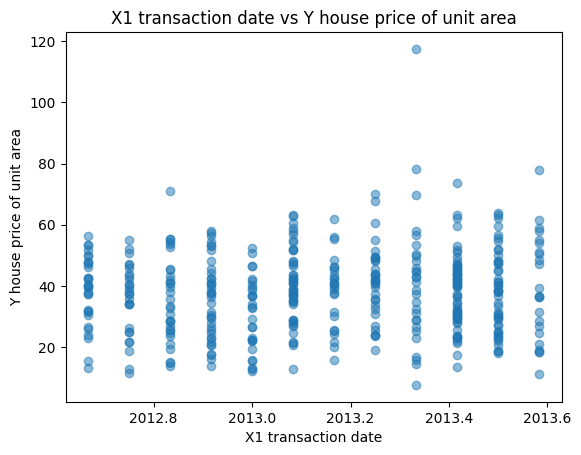

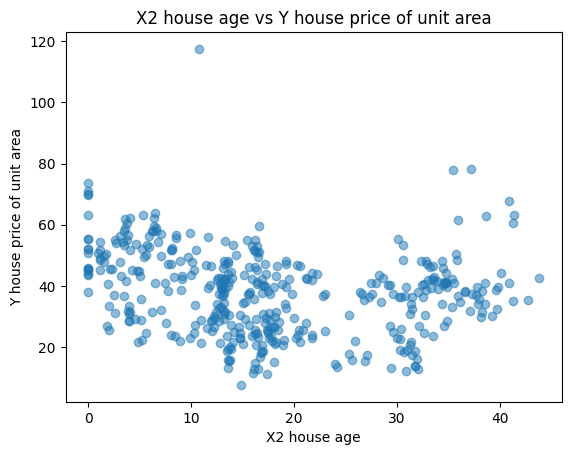

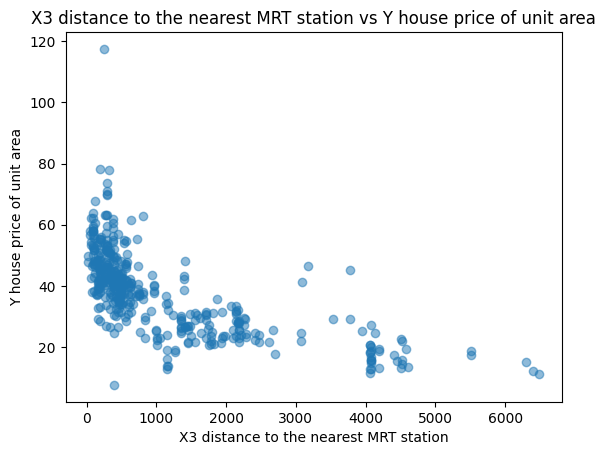

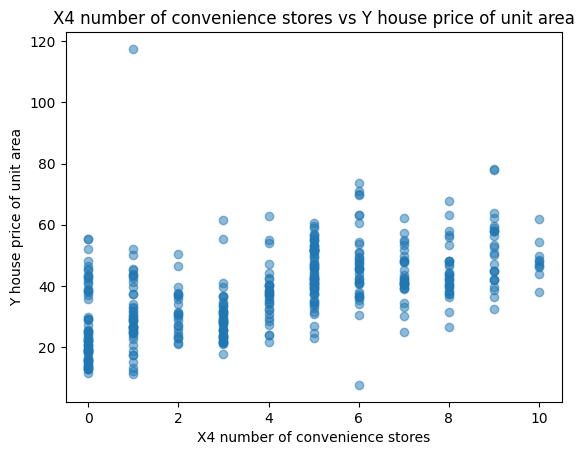

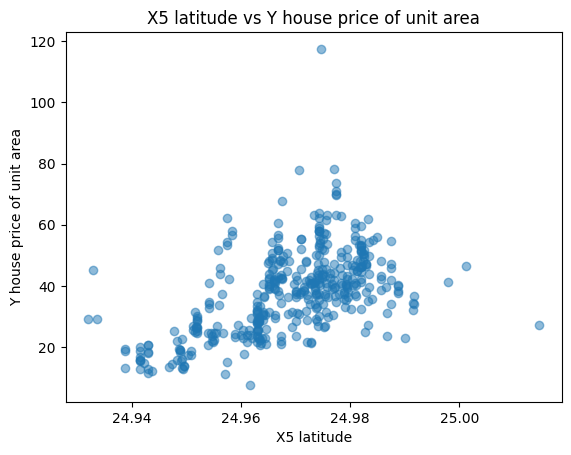

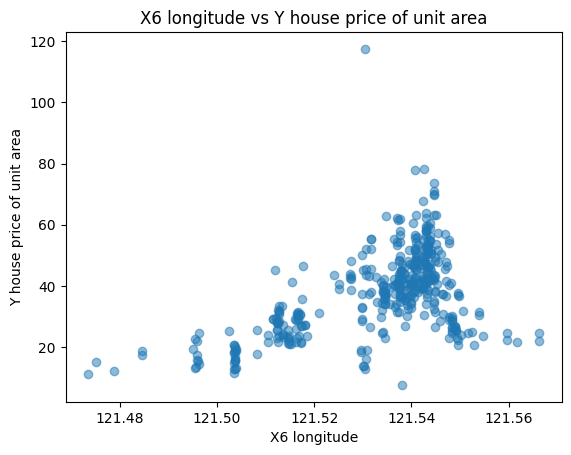


Scratch Model
MSE: 65.11
R2 : 0.5895

Sklearn Model
MSE: 66.75
R2 : 0.5792

Best Hyperparameters
Best LR: 0.05
Best Epochs: 3000
Best MSE: 65.01


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression as SklearnLR

df=pd.read_csv("Real estate.csv")
print("Null values:\n", df.isnull().sum())

target = df.columns[-1]
for col in df.columns[1:-1]:   
    plt.scatter(df[col], df[target], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel(target)
    plt.title(f"{col} vs {target}")
    plt.show()

df=df.drop(["No", "X1 transaction date"], axis=1)
X,y=df.iloc[:, :-1].values, df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

class LinearRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr, self.epochs = lr, epochs

    def fit(self, X, y):
        n,m=X.shape
        self.w, self.b=np.zeros(m), 0

        for _ in range(self.epochs):
            y_pred=X @ self.w + self.b
            dw = (1/n) * X.T @ (y_pred - y)
            db = (1/n) * np.sum(y_pred - y)
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return X @ self.w + self.b


my_model=LinearRegressionScratch(lr=0.05, epochs=4000)
my_model.fit(X_train, y_train)
my_pred=my_model.predict(X_test)

print("\nScratch Model")
print("MSE:", round(mean_squared_error(y_test, my_pred), 2))
print("R2 :", round(r2_score(y_test, my_pred), 4))

sk_model=SklearnLR()
sk_model.fit(X_train, y_train)
sk_pred = sk_model.predict(X_test)

print("\nSklearn Model")
print("MSE:", round(mean_squared_error(y_test, sk_pred), 2))
print("R2 :", round(r2_score(y_test, sk_pred), 4))

lrs=[0.005,0.01,0.05,0.1]
eps=[1000,3000,5000]

best_mse, best_params = float("inf"), None

for lr in lrs:
    for ep in eps:
        model=LinearRegressionScratch(lr=lr, epochs=ep)
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        mse = mean_squared_error(y_test, pred)

        if mse < best_mse:
            best_mse, best_params = mse, (lr, ep)

print("\nBest Hyperparameters")
print("Best LR:", best_params[0])
print("Best Epochs:", best_params[1])
print("Best MSE:", round(best_mse, 2))


# Logistic Regression
## Question 3

The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler   
import numpy as np

# 1.Load the dataset
data=load_breast_cancer()

# 2.Separate X and y
X=data.data
y=data.target

# 3.Normalize X data
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

# 4.Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Shapes:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)



Shapes:
X_train: (455, 30)
X_test : (114, 30)
y_train: (455,)
y_test : (114,)


5. Write code for the sigmoid function and Logistic regression.


In [5]:
import numpy as np

def sigmoid(z):
    return 1/(1+np.exp(-z))

def sigmoid_derivative(z):
    s=sigmoid(z)
    return s*(1 - s)


class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr=learning_rate
        self.epochs=epochs

    def fit(self,X,y):
        n,m=X.shape
        y=y.reshape(-1, 1)
        self.weights=np.zeros((m, 1))
        self.bias=0

        for _ in range(self.epochs):
            y_pred=sigmoid(X @ self.weights + self.bias)

            dw=(1/n)*(X.T @ (y_pred - y))
            db=(1/n)*np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_prob = sigmoid(X @ self.weights + self.bias)
        return (y_prob >= 0.5).astype(int)


6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [6]:
from sklearn.linear_model import LogisticRegression as SkLogReg
from sklearn.metrics import accuracy_score

# 6.Fit custom model and make predictions
my_clf=LogisticRegression(learning_rate=0.01, epochs=3000)
my_clf.fit(X_train, y_train)
y_pred_my=my_clf.predict(X_test)

print("Custom Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_my))


# 7.Compare with sklearn Logistic Regression (all penalties)

penalties=["none", "l1", "l2", "elasticnet"]
solvers={
    "none": "lbfgs",
    "l1": "liblinear",
    "l2": "lbfgs",
    "elasticnet": "saga"
}

print("\nSklearn Logistic Regression Accuracies:")
for p in penalties:
    try:
        sk_model = SkLogReg(
            penalty=p,
            solver=solvers[p],
            l1_ratio=0.5 if p == "elasticnet" else None,
            max_iter=5000
        )
        sk_model.fit(X_train, y_train)
        y_pred_sk = sk_model.predict(X_test)
        print(f"Penalty = {p:10s} | Accuracy =", accuracy_score(y_test, y_pred_sk))

    except Exception as e:
        print(f"Penalty = {p:10s} | Not supported ({e})")


Custom Logistic Regression Accuracy: 0.9473684210526315

Sklearn Logistic Regression Accuracies:
Penalty = none       | Not supported (The 'penalty' parameter of LogisticRegression must be a str among {'l2', 'elasticnet', 'l1'} or None. Got 'none' instead.)
Penalty = l1         | Accuracy = 0.956140350877193
Penalty = l2         | Accuracy = 0.9824561403508771
Penalty = elasticnet | Accuracy = 0.9824561403508771


9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression as SkLogReg

# Fit model
my_clf=LogisticRegression(learning_rate=0.01, epochs=3000)
my_clf.fit(X_train, y_train)
y_pred_my=my_clf.predict(X_test)

print("Custom Model Accuracy:", accuracy_score(y_test, y_pred_my))

# Trying all sklearn penalties and pick best
penalties=["none", "l1", "l2", "elasticnet"]
solvers={"none": "lbfgs", "l1": "liblinear", "l2": "lbfgs", "elasticnet": "saga"}

best_model, best_pred, best_acc = None, None, 0

for p in penalties:
    try:
        clf=SkLogReg(penalty=p, solver=solvers[p], l1_ratio=0.5 if p=="elasticnet" else None,
                       max_iter=5000)
        clf.fit(X_train, y_train)
        pred=clf.predict(X_test)
        acc=accuracy_score(y_test, pred)

        if acc>best_acc:
            best_acc, best_model, best_pred = acc, clf, pred
    except:
        pass

print(f"Best Sklearn Model Accuracy: {best_acc}")

# 9.Classification Reports
print("\nClassification Report: Custom Model")
print(classification_report(y_test, y_pred_my))

print("\nClassification Report: Best Sklearn Model")
print(classification_report(y_test, best_pred))

# 10.Confusion Matrices
print("\nConfusion Matrix: Custom Model")
print(confusion_matrix(y_test, y_pred_my))

print("\nConfusion Matrix: Best Sklearn Model")
print(confusion_matrix(y_test, best_pred))


Custom Model Accuracy: 0.9473684210526315
Best Sklearn Model Accuracy: 0.9824561403508771

Classification Report: Custom Model
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114


Classification Report: Best Sklearn Model
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Confusion Matrix: Custom Model
[[37  6]
 [ 0 71]]

Confusion Matrix: Best Sklearn Model
[[41  2]
 [ 0 71]]


# KNN
## Question 4

How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass".

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1.Load the data
df=pd.read_csv(r"C:\Users\Hp\Downloads\glass.csv")
print(df.head())
print("\nNull values:\n", df.isnull().sum())

# 2.Extract X and y
X=df.iloc[:, 1:-1].values  
y=df.iloc[:, -1].values

print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)

# 3.Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print("\nTraining set size:", X_train.shape)
print("Testing set size :", X_test.shape)


        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

Null values:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Shape of X: (214, 8)
Shape of y: (214,)

Training set size: (160, 8)
Testing set size : (54, 8)


4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [12]:
import numpy as np

# 4.Euclidean Distance
def euclidean_distance(a,b):
    return np.sqrt(np.sum((a-b)**2))

# 5.KNN Model
class KNN:
    def __init__(self,k=3):
        self.k=k

    def fit(self,X,y):
        self.X=np.array(X)
        self.y=np.array(y)

    def predict(self,X):
        X=np.array(X)
        preds=[]
        for x in X:
            dists=np.sqrt(np.sum((self.X - x)**2, axis=1))
            k_idx=np.argsort(dists)[:self.k]
            k_labels=self.y[k_idx]
            preds.append(np.bincount(k_labels).argmax())
        return np.array(preds)

# 6.Fit Model
knn=KNN(k=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [13]:
from sklearn.metrics import accuracy_score

for k in [1,3,5,7,9]:
    knn=KNN(k=k)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    print(f"k = {k}, Accuracy = {acc:.4f}")


k = 1, Accuracy = 0.7778
k = 3, Accuracy = 0.7037
k = 5, Accuracy = 0.6296
k = 7, Accuracy = 0.5926
k = 9, Accuracy = 0.5926


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

sk_knn=KNeighborsClassifier(n_neighbors=3)
sk_knn.fit(X_train, y_train)

sk_pred=sk_knn.predict(X_test)
sk_acc=accuracy_score(y_test, sk_pred)

print("Sklearn KNN Accuracy (k=3):", sk_acc)


Sklearn KNN Accuracy (k=3): 0.7037037037037037
